# Implementasi Data Mining: Klasifikasi dengan Decision Tree

# 1. Persiapkan data dan Impor Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree


# 2. Memuat dan Memeriksa Data
# Gunakan dataset Wine dari scikit-learn 

In [7]:
from sklearn.datasets import load_wine

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

print("Informasi Dataset:")
print(X.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null   

# 3. Analisis Eksploratori Data (EDA)

# 3.1 Statistik Deskriptif

In [9]:
print("\nStatistik Deskriptif:")
print(X.describe())


Statistik Deskriptif:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.57

# 3.2 Visualisasi distribusi kelas

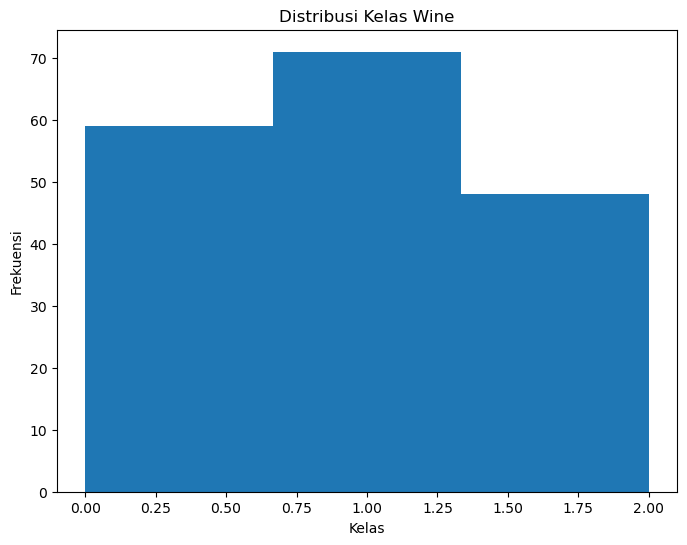

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(y, bins=3)
plt.title('Distribusi Kelas Wine')
plt.xlabel('Kelas')
plt.ylabel('Frekuensi')
plt.show()

# 4. Preprocessing Data

# Membagi data menjadi set pelatihan dan pengujian

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 5. Implementasi Algoritma Klasifikasi (Decision Tree)

# Membuat dan melatih model Decision Tree

In [12]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# 6. Evaluasi Model menggunakan berbagai metrik (akurasi, laporan klasifikasi, confusion matrix)

# 6.1 Membuat prediksi

In [13]:
y_pred = dt_classifier.predict(X_test)

# 6.2 Menghitung akurasi

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy:.2f}")


Akurasi Model: 0.94


# 6.3 Mencetak laporan klasifikasi

In [15]:
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


Laporan Klasifikasi:
              precision    recall  f1-score   support

     class_0       0.93      0.93      0.93        14
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



# 6.4 Membuat dan menampilkan confusion matrix

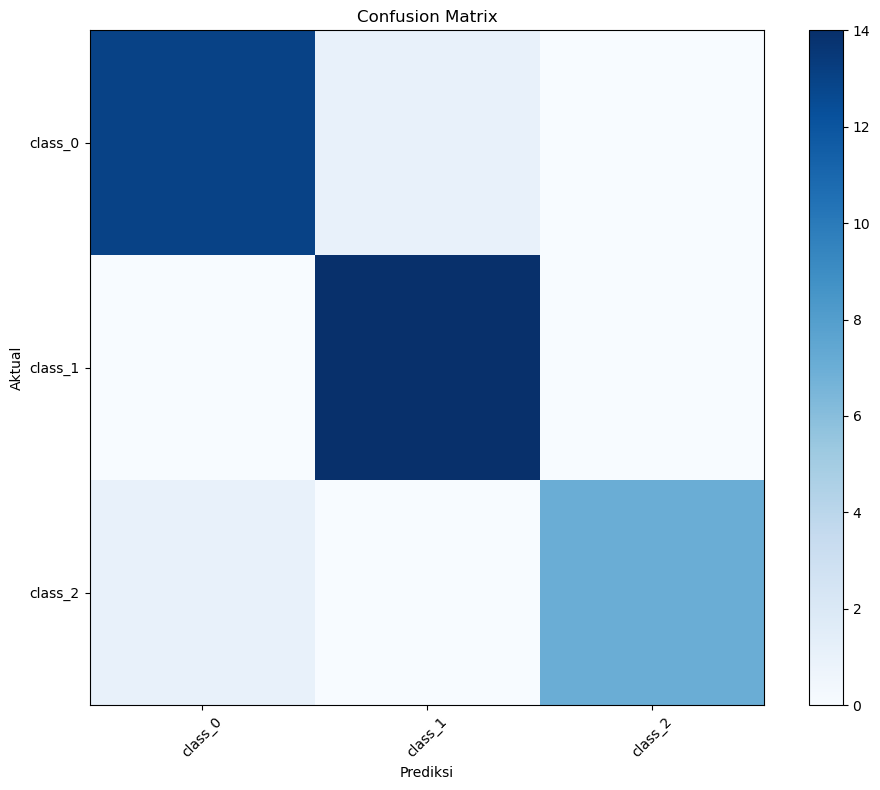

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(wine.target_names))
plt.xticks(tick_marks, wine.target_names, rotation=45)
plt.yticks(tick_marks, wine.target_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

# 7. Visualisasi Decision Tree

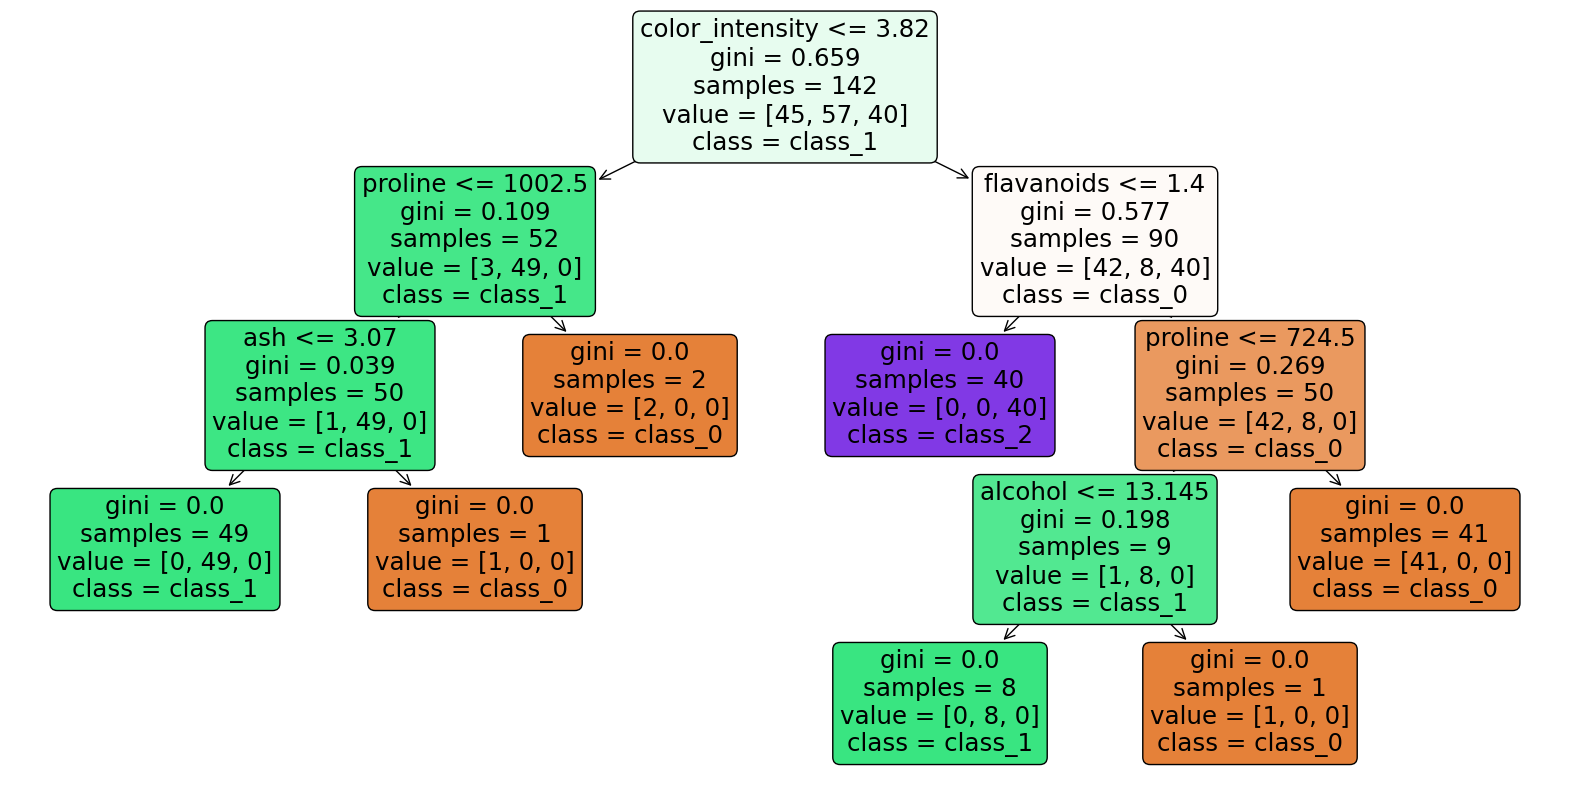

In [18]:
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=wine.feature_names, class_names=wine.target_names, filled=True, rounded=True)
plt.show()

# 8. Analisis Fitur Penting

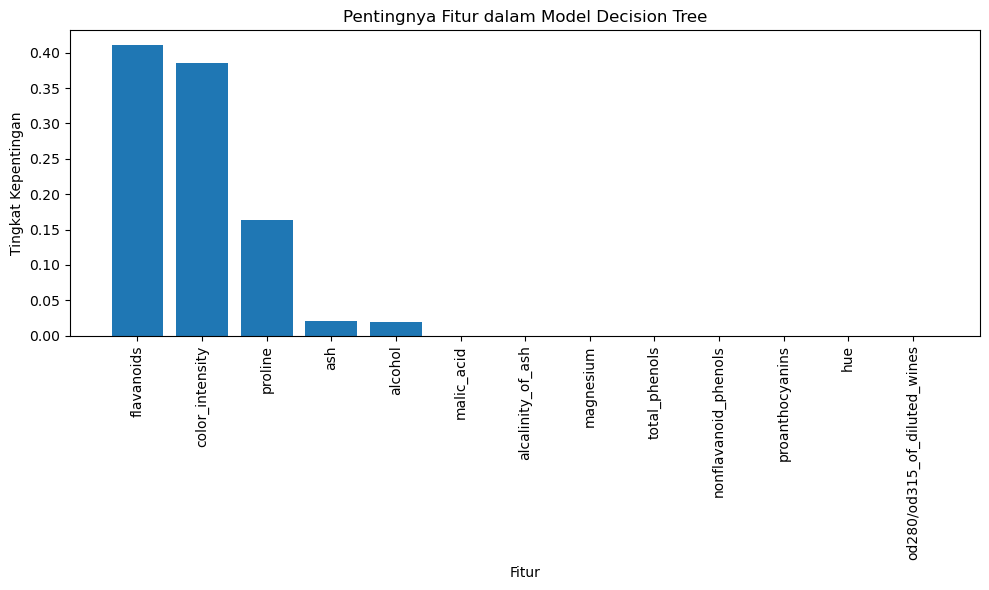

In [19]:
feature_importance = pd.DataFrame({'feature': wine.feature_names, 'importance': dt_classifier.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Pentingnya Fitur dalam Model Decision Tree')
plt.xlabel('Fitur')
plt.ylabel('Tingkat Kepentingan')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Proses ini memberikan wawasan tentang bagaimana Decision Tree dapat digunakan untuk klasifikasi dalam dataset Wine, serta bagaimana kita dapat mengevaluasi dan menginterpretasikan model yang dihasilkan.